In [6]:
import polars as pl
from PIL.Image import Image

from fdray import *
from fdray.data import (
    from_spherical_coordinates,
    to_spherical_coordinates,
    visualize_spherical_data,
)


In [7]:
def render(image: Image):
    return Scene(
        Camera(40, 20, view_scale=1.2),
        LightSource((0.7, 50, 90), "white"),
        Cylinder(0, "1.2*x", 0.01, Color("red")),
        Cylinder(0, "1.2*y", 0.01, Color("green")),
        Cylinder(0, "1.2*z", 0.01, Color("blue")),
        Sphere(
            0,
            1,
            Pigment.uv_mapping(image, interpolate=3),
            Finish(ambient=0.2, diffuse=0.8, specular=0.2),
        ),
    ).render(200, 200, trim=True)

In [8]:
df = (
    from_spherical_coordinates()
    .with_columns(xyz=pl.col("x") * pl.col("y") * pl.col("z"))
    .pipe(to_spherical_coordinates)
)


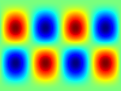

In [11]:
image = visualize_spherical_data(df, "xyz")
image

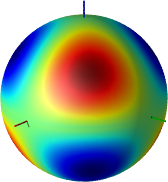

In [12]:
render(image)